In [25]:
import ROOT

In [26]:
if "histnew" in ROOT.gDirectory.GetList():
    ROOT.gDirectory.Delete("histnew;*")
histnew = ROOT.TH1F("histnew", "Example Histogram", 101, -50.5, 50.5)

for i in range(1000):
    x = ROOT.gRandom.Gaus(2.5, 1.0)
    histnew.Fill(x)
    
if "cplot1" in ROOT.gROOT.GetListOfCanvases():
    ROOT.gROOT.GetListOfCanvases().FindObject("cplot1").Close()
cplot1 = ROOT.TCanvas("cplot1", "Example Canvas")
cplot1.Update()
histnew.Draw()
cplot1.SaveAs("histo.png")


Info in <TCanvas::Print>: png file histo.png has been created


In [ ]:
import ROOT
import random

# Configuración de la geometría del hodoscopio cúbico
x_cells = 10
y_cells = 10
z_cells = 10
cell_size = 1.0 # Tamaño de la celda en cm

# Configuración del ángulo de llegada de los muones
theta = 45.0 # Ángulo polar (en grados)
phi = 30.0 # Ángulo azimutal (en grados)

# Configuración de la energía de los muones
energy = 100.0 # Energía en GeV

# Creación del hodoscopio
if "hodoscope" in ROOT.gDirectory.GetList():
    ROOT.gDirectory.Delete("hodoscope;*")
hodoscope = ROOT.TH3D("hodoscope", "Hodoscope", x_cells, 0, x_cells*cell_size, y_cells, 0, y_cells*cell_size, z_cells, 0, z_cells*cell_size)

# Función que simula la llegada de los muones al hodoscopio
def simulate_muons():
    # Cálculo de la dirección de llegada de los muones
    theta_rad = ROOT.TMath.DegToRad()*theta
    phi_rad = ROOT.TMath.DegToRad()*phi
    direction = ROOT.TVector3(ROOT.TMath.Sin(theta_rad)*ROOT.TMath.Cos(phi_rad), ROOT.TMath.Sin(theta_rad)*ROOT.TMath.Sin(phi_rad), ROOT.TMath.Cos(theta_rad))
    # Creación del muón
    muon = ROOT.TLorentzVector(direction.x()*energy, direction.y()*energy, direction.z()*energy, energy)
    # Simulación de la llegada del muón al hodoscopio
    x_pos = random.uniform(0, x_cells)*cell_size
    y_pos = random.uniform(0, y_cells)*cell_size
    z_pos = 0
    hodoscope.Fill(x_pos, y_pos, z_pos, muon.E())

# Simulación de varios muones llegando al hodoscopio
Nsimu = 1000000
for i in range(Nsimu):
    simulate_muons()

# Visualización del hodoscopio
    
if "cplot2" in ROOT.gROOT.GetListOfCanvases():
    ROOT.gROOT.GetListOfCanvases().FindObject("cplot2").Close()

cplot2 = ROOT.TCanvas("cplot2", "Hodoscope", 800, 800)
cplot2.Update()
hodoscope.Draw("BOX2")
cplot2.SaveAs("histo.png")

In [19]:
import ROOT
import random

# Define the size and spacing of the hodoscope panels and strips
panel_spacing = 2.5 # in meters
strip_size = 2.64 # in cm
strips_per_panel = 64

# Define the dimensions of the hodoscope panels
panel_width = strips_per_panel * strip_size
panel_height = panel_width

# Define the position of the bottom and top panels
bottom_panel_pos = ROOT.TVector3(0, 0, 0)
top_panel_pos = ROOT.TVector3(0, 0, panel_spacing)

# Create a canvas to display the hodoscope panels
canvas1 = ROOT.TCanvas("canvas1", "Hodoscope", 800, 800)

# Create histograms to represent the hodoscope panels
bottom_panel_hist = ROOT.TH2F("bottom_panel_hist", "Bottom Panel", strips_per_panel, 0, panel_width, strips_per_panel, 0, panel_height)
top_panel_hist = ROOT.TH2F("top_panel_hist", "Top Panel", strips_per_panel, 0, panel_width, strips_per_panel, 0, panel_height)

# Loop over 1000 simulated cosmic muons
Nsimu = 1000000
for i in range(Nsimu):
    # Generate a random position and direction for the muon
    muon_pos = ROOT.TVector3(random.uniform(0, panel_width), random.uniform(0, panel_height), -10)
    muon_dir = ROOT.TVector3(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(0, 1)).Unit()
    
    # Calculate the intersection point of the muon with the bottom panel
    bottom_panel_int = bottom_panel_pos + (muon_pos - bottom_panel_pos).Dot(ROOT.TVector3(0, 0, 1)) / muon_dir.Dot(ROOT.TVector3(0, 0, 1)) * muon_dir
    
    # Calculate the intersection point of the muon with the top panel
    top_panel_int = top_panel_pos + (muon_pos - top_panel_pos).Dot(ROOT.TVector3(0, 0, -1)) / muon_dir.Dot(ROOT.TVector3(0, 0, -1)) * muon_dir
    
    # Calculate the strip indices for the intersection points
    bottom_strip_x = int(bottom_panel_int.x() / strip_size)
    bottom_strip_y = int(bottom_panel_int.y() / strip_size)
    top_strip_x = int(top_panel_int.x() / strip_size)
    top_strip_y = int(top_panel_int.y() / strip_size)
    
    # Fill the corresponding strips in the histograms
    bottom_panel_hist.Fill(bottom_strip_x * strip_size, bottom_strip_y * strip_size)
    top_panel_hist.Fill(top_strip_x * strip_size, top_strip_y * strip_size)

# Draw the histograms on the canvas
canvas1.Divide(2, 1)
canvas1.cd(1)
bottom_panel_hist.Draw("colz")
canvas1.cd(2)
top_panel_hist.Draw("colz")
canvas1.Update()
canvas1.SaveAs("Muon-reponse.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1
Warning in <TROOT::Append>: Replacing existing TH1: bottom_panel_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: top_panel_hist (Potential memory leak).
Info in <TCanvas::Print>: png file Muon-reponse.png has been created


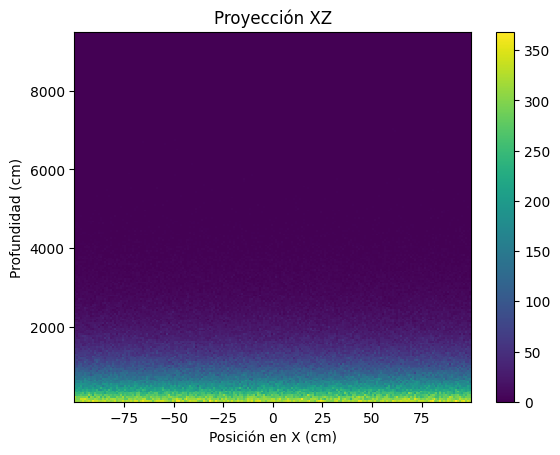

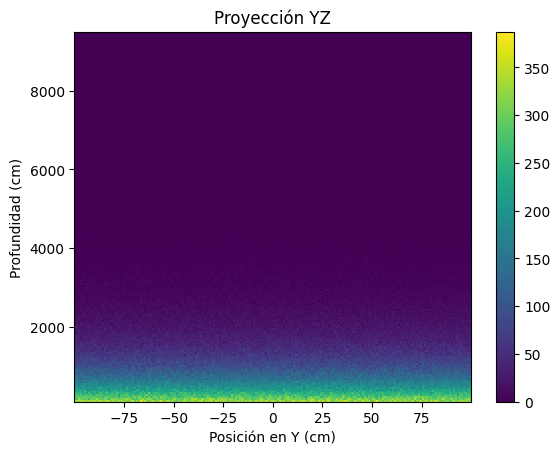

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
n_events = 1000000 # Número de eventos
length = 200 # Longitud de la caja (en cm)
bins = 200 # Número de bins para el histograma

# Generar eventos de muones cósmicos aleatorios
x = np.random.uniform(-length/2, length/2, n_events)
y = np.random.uniform(-length/2, length/2, n_events)
z = length/2 + np.random.exponential(scale=700, size=n_events) # Distribución exponencial para la profundidad

# Histograma 2D para la proyección XZ
plt.hist2d(x, z, bins=bins, cmap='viridis')
plt.colorbar()
plt.xlabel('Posición en X (cm)')
plt.ylabel('Profundidad (cm)')
plt.title('Proyección XZ')
plt.show()

# Histograma 2D para la proyección YZ
plt.hist2d(y, z, bins=bins, cmap='viridis')
plt.colorbar()
plt.xlabel('Posición en Y (cm)')
plt.ylabel('Profundidad (cm)')
plt.title('Proyección YZ')
plt.show()